In [5]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

# audio_path = '001.wav'
audio_path = 'vio_draft.wav'
x, sr = librosa.load(audio_path)
print(f'x = {x}')
print(f'x.shape = {x.shape}') # （采样率*语音时间，）
print(f'sr = {sr}')# 采样率

x = [ 0.01367934  0.01449704  0.01177255 ...  0.00164955 -0.00432799
  0.        ]
x.shape = (66150,)
sr = 22050


In [6]:
# 取前500ms (这个地方应该后面再取，从energy大于0.1之后取500ms)
rem = int(x.shape[0] - sr * 0.5)
print(rem)
x = x[:-rem]
print(x.shape)

55125
(11025,)


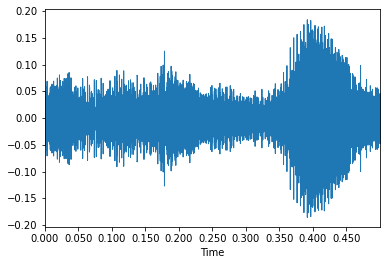

In [9]:
#原始波形图
librosa.display.waveplot(x)
plt.savefig('draft1.png')
plt.show()

In [10]:
#短时傅里叶变换
stft = librosa.stft(x, n_fft=1024, hop_length=512)
print(f'stft.shape = {stft.shape}')

stft.shape = (513, 22)


c:\users\neko_maru~\appdata\local\programs\python\python37\lib\site-packages\librosa\display.py:955: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  "Trying to display complex-valued input. " "Showing magnitude instead."


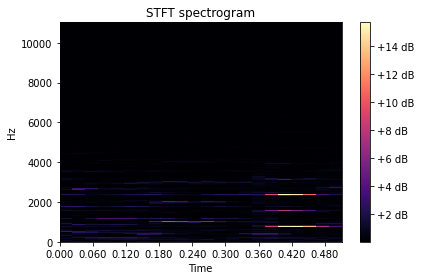

In [11]:
#频谱特征图
librosa.display.specshow(stft, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('STFT spectrogram')
plt.tight_layout()
plt.show()

# mfcc = librosa.feature.mfcc(x, n_fft=2048, n_mfcc = 36)
# print(f'mfcc.shape = {mfcc.shape}')
# librosa.display.specshow(mfcc, x_axis='time', y_axis='hz')
# plt.show()

#np.ndarray [shape=(n_mels, t)]
# mel = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128)
# print(mel)

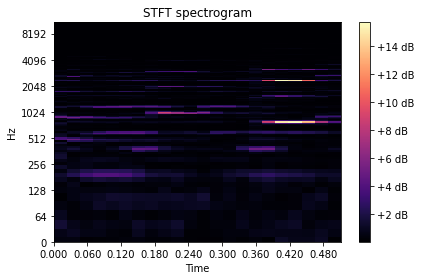

In [15]:
# linear to log 只是用于显示频谱图，不是必备步骤
librosa.display.specshow(stft, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('STFT spectrogram')
plt.tight_layout()

plt.show()

In [16]:
# mel = librosa.feature.melspectrogram(y=x, sr=sr)
# mel

In [17]:
stft = librosa.stft(x, n_fft=1024, hop_length=512)
D = np.abs(stft) ** 2  # 这一步不确定  
mel = librosa.feature.melspectrogram(S=D, sr=sr)  # 使用stft频谱求梅尔幅度频谱 (Mel)
print(mel.shape)
mel

(128, 22)


array([[4.3290410e-02, 3.6499806e-02, 1.2797711e-02, ..., 1.2589768e-02,
        2.9378235e-02, 1.4463183e-02],
       [7.4812099e-02, 1.3870815e-02, 7.6476908e-03, ..., 6.6097230e-03,
        9.3301646e-03, 1.4154666e-02],
       [2.1039877e-02, 2.7485106e-03, 9.3906913e-03, ..., 2.1856105e-02,
        9.1484683e-03, 2.0955955e-03],
       ...,
       [2.3941614e-06, 1.8049363e-07, 1.3010259e-07, ..., 7.1541064e-07,
        1.5184102e-07, 2.9711464e-06],
       [6.1067035e-06, 1.1069014e-07, 7.2239821e-08, ..., 1.4824727e-07,
        9.7550533e-08, 2.6266857e-06],
       [7.3450060e-06, 1.1018004e-08, 8.8165688e-09, ..., 6.4608798e-09,
        3.5337531e-09, 2.2908166e-06]], dtype=float32)

(128, 22)


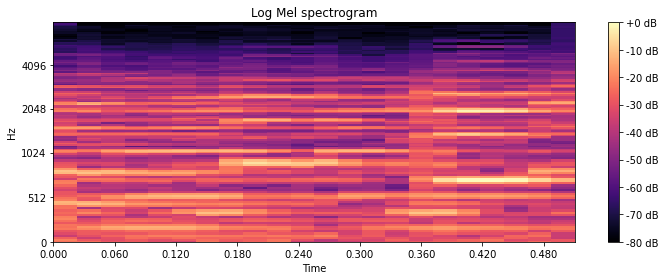

In [19]:
plt.figure(figsize=(10, 4))
logmel = librosa.power_to_db(mel, ref=np.max)
print(logmel.shape)
librosa.display.specshow(logmel, y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Log Mel spectrogram')
plt.tight_layout()
plt.savefig('draft2.png')
plt.show()

In [11]:
# Normalization
print("log mel", logmel)
logmel -= np.mean(logmel, axis=0)
print("mean", np.mean(logmel, axis=0))
print("mean to 0", logmel)
logmel /= np.std(logmel, ddof=1)
print("std to 1", logmel)

log mel [[-24.830706 -36.932796 -43.701702 ... -24.924074 -24.959497 -26.9744  ]
 [-28.01886  -23.992727 -25.212154 ... -22.280722 -17.259    -22.759804]
 [-24.834753 -19.95914  -19.801113 ... -10.173286 -12.356281 -20.19912 ]
 ...
 [-61.822674 -64.344505 -73.30203  ... -71.699646 -69.975136 -71.4998  ]
 [-61.446384 -72.136444 -80.       ... -75.01615  -75.539734 -76.218414]
 [-61.96063  -80.       -80.       ... -80.       -80.       -80.      ]]
mean [-1.81794167e-06  9.62615013e-06  8.25524330e-06 -1.96695328e-06
 -1.41561031e-05 -1.17421150e-05  2.35438347e-06  1.19209290e-07
 -1.43051147e-05  4.44054604e-06  5.33461571e-06 -2.62260437e-06
 -1.14142895e-05  1.51991844e-06 -2.62260437e-06  1.40070915e-05
 -6.55651093e-06 -3.99351120e-06 -6.55651093e-07 -3.21865082e-06
  7.33137131e-06 -2.68220901e-06]
mean to 0 [[ 18.010733   9.983368   4.633774 ...  19.140917  19.881681  17.55415 ]
 [ 14.822578  22.923437  23.123322 ...  21.78427   27.582178  21.768745]
 [ 18.006685  26.957024  28.